In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import netCDF4 as nc

# Open the NetCDF file
fh = nc.Dataset('/content/drive/MyDrive/Stats AI ML/Data/RF25_ind2010_rfp25.nc', mode='r')

# Print the details of the NetCDF file
print(fh)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: FERRET V7.5 (optimized) 20-Jan-23
    Conventions: CF-1.6
    dimensions(sizes): LONGITUDE(135), LATITUDE(129), TIME(365)
    variables(dimensions): float64 LONGITUDE(LONGITUDE), float64 LATITUDE(LATITUDE), float64 TIME(TIME), float64 RAINFALL(TIME, LATITUDE, LONGITUDE)
    groups: 


In [ ]:
# Extract the longitude, latitude, rainfall, and time variables
lon = fh.variables['LONGITUDE'][:]
lat = fh.variables['LATITUDE'][:]
rainfall = fh.variables['RAINFALL'][:]
time = fh.variables['TIME'][:]

In [ ]:
import xarray as xr
import pandas as pd

# Load the netCDF file
ds = xr.open_dataset('/content/drive/MyDrive/Stats AI ML/Data/RF25_ind2022_rfp25.nc')

# Select the variable you want to convert to a DataFrame
var = ds

# Convert the variable to a Pandas DataFrame
df = var.to_dataframe()

In [ ]:
idx = df.index.to_list()

In [ ]:
df.shape[0]/365

17415.0

In [ ]:
average_rain = [np.mean(df['RAINFALL'].iloc[365*i:365*(i+1)]) for i in range(int(df.shape[0]/365))]

In [ ]:
len(average_rain)

17415

In [ ]:
df.iloc[0]

Unnamed: 0             0
LONGITUDE           66.5
LATITUDE             6.5
TIME          2022-01-01
RAINFALL             NaN
Name: 0, dtype: object

In [ ]:
data = {'LONGITUDE':[], 'LATITUDE':[], 'TIME':[], 'RAINFALL':[]}
for i in range(len(idx)):
  data['LONGITUDE'].append(idx[i][0])
  data['LATITUDE'].append(idx[i][1])
  data['TIME'].append(idx[i][2])
  data['RAINFALL'].append(df['RAINFALL'].iloc[i])

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data

,LONGITUDE,LATITUDE,TIME,RAINFALL
0,66.5,6.5,2022-01-01,NaN
1,66.5,6.5,2022-01-02,NaN
2,66.5,6.5,2022-01-03,NaN
3,66.5,6.5,2022-01-04,NaN
4,66.5,6.5,2022-01-05,NaN
...,...,...,...,...
6356470,100.0,38.5,2022-12-27,NaN
6356471,100.0,38.5,2022-12-28,NaN
6356472,100.0,38.5,2022-12-29,NaN
6356473,100.0,38.5,2022-12-30,NaN


In [ ]:
mean_data = {'LONGITUDE':[], 'LATITUDE':[],'AVERAGE_RAINFALL':[]}
for i in range(int(len(data)/365)):
  mean_data['LONGITUDE'].append(data['LONGITUDE'].iloc[365*i])
  mean_data['LATITUDE'].append(data['LATITUDE'].iloc[365*i])
  mean_data['AVERAGE_RAINFALL'].append(average_rain[i])

In [ ]:
mean_data = pd.DataFrame(mean_data)

In [ ]:
mean_data

,LONGITUDE,LATITUDE,AVERAGE_RAINFALL
0,66.5,6.50,NaN
1,66.5,6.75,NaN
2,66.5,7.00,NaN
3,66.5,7.25,NaN
4,66.5,7.50,NaN
...,...,...,...
17410,100.0,37.50,NaN
17411,100.0,37.75,NaN
17412,100.0,38.00,NaN
17413,100.0,38.25,NaN


In [ ]:
mean_df_cleaned = mean_data.dropna(subset=['AVERAGE_RAINFALL'])

In [ ]:
mean_df_cleaned

,LONGITUDE,LATITUDE,AVERAGE_RAINFALL
843,68.00,23.75,2.778914
844,68.00,24.00,2.825527
971,68.25,23.50,2.685911
972,68.25,23.75,2.764601
973,68.25,24.00,2.811226
...,...,...,...
15824,97.00,28.00,6.957110
15825,97.00,28.25,6.953696
15826,97.00,28.50,6.487397
15953,97.25,28.00,6.953699


In [ ]:
data.to_csv('rainfall_1998.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stats AI ML/csv files/rainfall_2022.csv')

In [ ]:
df

,Unnamed: 0,LONGITUDE,LATITUDE,TIME,RAINFALL
0,0,66.5,6.5,2022-01-01,NaN
1,1,66.5,6.5,2022-01-02,NaN
2,2,66.5,6.5,2022-01-03,NaN
3,3,66.5,6.5,2022-01-04,NaN
4,4,66.5,6.5,2022-01-05,NaN
...,...,...,...,...,...
6356470,6356470,100.0,38.5,2022-12-27,NaN
6356471,6356471,100.0,38.5,2022-12-28,NaN
6356472,6356472,100.0,38.5,2022-12-29,NaN
6356473,6356473,100.0,38.5,2022-12-30,NaN


In [ ]:
df_cleaned = df.dropna(subset=['RAINFALL'])

In [ ]:
df_cleaned

,Unnamed: 0,LONGITUDE,LATITUDE,TIME,RAINFALL
307695,307695,68.00,23.75,2022-01-01,0.00000
307696,307696,68.00,23.75,2022-01-02,0.00000
307697,307697,68.00,23.75,2022-01-03,0.00000
307698,307698,68.00,23.75,2022-01-04,0.00000
307699,307699,68.00,23.75,2022-01-05,0.49351
...,...,...,...,...,...
5823570,5823570,97.25,28.25,2022-12-27,0.00000
5823571,5823571,97.25,28.25,2022-12-28,0.00000
5823572,5823572,97.25,28.25,2022-12-29,0.00000
5823573,5823573,97.25,28.25,2022-12-30,0.00000


In [ ]:
df_cleaned.drop(columns = 'Unnamed: 0')

,LONGITUDE,LATITUDE,TIME,RAINFALL
307695,68.00,23.75,2022-01-01,0.00000
307696,68.00,23.75,2022-01-02,0.00000
307697,68.00,23.75,2022-01-03,0.00000
307698,68.00,23.75,2022-01-04,0.00000
307699,68.00,23.75,2022-01-05,0.49351
...,...,...,...,...
5823570,97.25,28.25,2022-12-27,0.00000
5823571,97.25,28.25,2022-12-28,0.00000
5823572,97.25,28.25,2022-12-29,0.00000
5823573,97.25,28.25,2022-12-30,0.00000


In [ ]:
df_cleaned.describe()

,Unnamed: 0,LONGITUDE,LATITUDE,RAINFALL
count,1.811860e+06,1.811860e+06,1.811860e+06,1.811860e+06
mean,2.466045e+06,7.945996e+01,2.361246e+01,3.444323e+00
std,1.136755e+06,6.032682e+00,6.038607e+00,1.182580e+01
min,3.076950e+05,6.800000e+01,8.250000e+00,0.000000e+00
25%,1.682285e+06,7.525000e+01,1.975000e+01,0.000000e+00
50%,2.220294e+06,7.825000e+01,2.400000e+01,0.000000e+00
75%,2.997014e+06,8.225000e+01,2.725000e+01,6.466088e-01
max,5.823574e+06,9.725000e+01,3.725000e+01,9.791448e+02


In [ ]:
df_cleaned.dtypes

Unnamed: 0      int64
LONGITUDE     float64
LATITUDE      float64
TIME           object
RAINFALL      float64
dtype: object

In [ ]:
from datetime import datetime

In [ ]:
columns_to_retain = ['', 'Column3']  # Replace with the column names you want to keep

# Select columns with specific names to retain
selected_columns = df[columns_to_retain]

In [ ]:
pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 40.4 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

In [ ]:
lon_min, lon_max = np.min(lon), np.max(lon)
lat_min, lat_max = np.min(lat), np.max(lat)
rainfall_min, rainfall_max = np.min(rainfall), np.max(rainfall)
time_min, time_max = np.min(time), np.max(time)

print(f"Longitude Range: {lon_min} to {lon_max}")
print(f"Latitude Range: {lat_min} to {lat_max}")
print(f"Rainfall Range: {rainfall_min} to {rainfall_max}")
print(f"Time Range: {time_min} to {time_max}")

Longitude Range: 66.5 to 100.0
Latitude Range: 6.5 to 38.5
Rainfall Range: 0.0 to 494.7169494628906
Time Range: 39813.0 to 40177.0


In [ ]:
# Assuming you've already extracted your variables as mentioned earlier

# View the data within each variable
print("Longitude Data:")
print(lon)

print("\nLatitude Data:")
print(lat)

print("\nRainfall Data:")
print(rainfall)

print("\nTime Data:")
print(time)


Longitude Data:
[ 66.5   66.75  67.    67.25  67.5   67.75  68.    68.25  68.5   68.75
  69.    69.25  69.5   69.75  70.    70.25  70.5   70.75  71.    71.25
  71.5   71.75  72.    72.25  72.5   72.75  73.    73.25  73.5   73.75
  74.    74.25  74.5   74.75  75.    75.25  75.5   75.75  76.    76.25
  76.5   76.75  77.    77.25  77.5   77.75  78.    78.25  78.5   78.75
  79.    79.25  79.5   79.75  80.    80.25  80.5   80.75  81.    81.25
  81.5   81.75  82.    82.25  82.5   82.75  83.    83.25  83.5   83.75
  84.    84.25  84.5   84.75  85.    85.25  85.5   85.75  86.    86.25
  86.5   86.75  87.    87.25  87.5   87.75  88.    88.25  88.5   88.75
  89.    89.25  89.5   89.75  90.    90.25  90.5   90.75  91.    91.25
  91.5   91.75  92.    92.25  92.5   92.75  93.    93.25  93.5   93.75
  94.    94.25  94.5   94.75  95.    95.25  95.5   95.75  96.    96.25
  96.5   96.75  97.    97.25  97.5   97.75  98.    98.25  98.5   98.75
  99.    99.25  99.5   99.75 100.  ]

Latitude Data:
[ 6.5   

In [ ]:
# Get the shape of each variable
lon_shape = lon.shape
lat_shape = lat.shape
rainfall_shape = rainfall.shape
time_shape = time.shape

# Print the shapes
print("Shape of Longitude Data:", lon_shape)
print("Shape of Latitude Data:", lat_shape)
print("Shape of Rainfall Data:", rainfall_shape)
print("Shape of Time Data:", time_shape)

Shape of Longitude Data: (135,)
Shape of Latitude Data: (129,)
Shape of Rainfall Data: (365, 129, 135)
Shape of Time Data: (365,)


In [ ]:
import numpy as np

In [ ]:
rainfall[0].shape

(129, 135)

In [ ]:
pip install basemap-data-hires

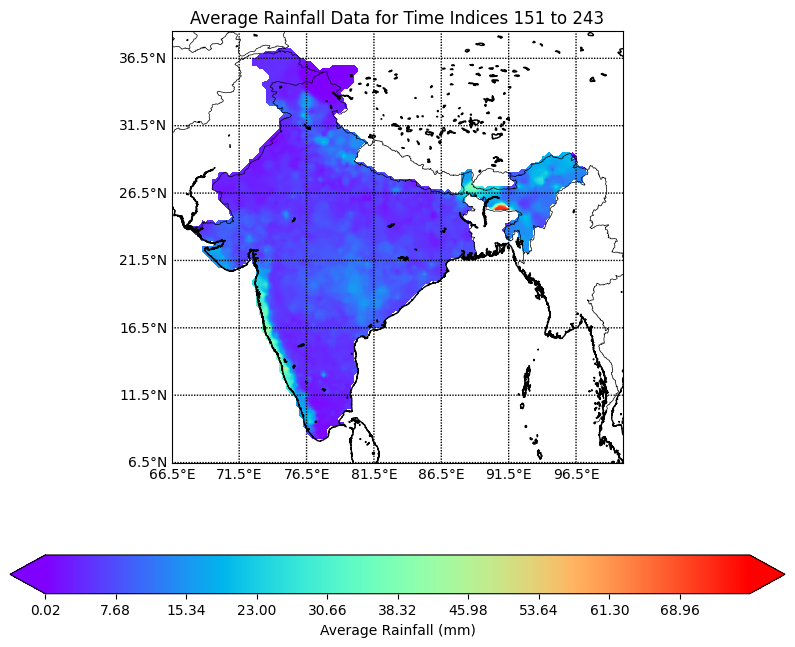

In [ ]:
# Define the time indices for which you want to compute averages (100 to 120)
start_time_index = 151
end_time_index = 243

# Filter the data for the specified time indices and calculate the mean
selected_rainfall_data = rainfall[start_time_index:end_time_index + 1]
average_rainfall = np.mean(selected_rainfall_data, axis=0)

# Create a Basemap instance with higher resolution and more longitude/latitude points
m = Basemap(projection='cyl', resolution='h',
            llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
            llcrnrlon=np.min(lon), urcrnrlon=np.max(lon))

# Create a grid of longitudes and latitudes for your averaged data with more points
lon, lat = np.meshgrid(lon, lat)

# Define custom levels and colormap for the colorbar
#levels = np.linspace(average_rainfall.min(), average_rainfall.max(), 1000)  # Adjust the number of levels for sensitivity
levels = 5000
cmap = plt.get_cmap('rainbow')  # You can choose a different colormap

# Plot the averaged rainfall data with the custom colorbar settings
plt.figure(figsize=(10, 8))
cs = m.contourf(lon, lat, average_rainfall, levels=levels, cmap=cmap, extend='both')
m.drawcoastlines()
m.drawcountries()
m.drawstates()


# Draw gridlines
parallels = np.arange(np.min(lat), np.max(lat), 5)  # Set latitude intervals for gridlines
meridians = np.arange(np.min(lon), np.max(lon), 5)  # Set longitude intervals for gridlines
m.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10)
m.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10)

# Add a colorbar with a sensitive color scale
cbar = plt.colorbar(cs, location='bottom', label='Average Rainfall (mm)')

# You can add more customization and annotations as needed

# Display the plot with the custom colorbar
plt.title(f'Average Rainfall Data for Time Indices {start_time_index} to {end_time_index}')
plt.show()


In [ ]:
filtered_latitude.shape

(4952, 135)

In [ ]:
filtered_longitude.shape

(4952, 135)

In [ ]:
mean_rainfall.shape

(129, 135)

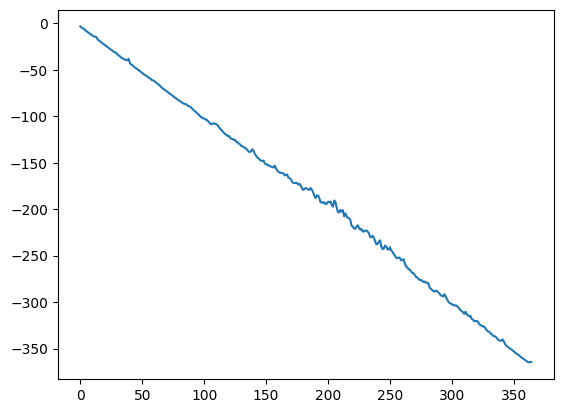

In [ ]:
# Prepare sst anomaly (sst value - mean sst value) for the whole dataset as model input
X = rainfall - np.mean(rainfall,axis=0)

# Calculate sst anomaly for the nino 3.4 region
nino_3_4_sst_anomaly = X

#calculate spatial mean nino 3.4 sst anomaly for each year
mean_nino_3_4_sst_anomaly = np.mean(nino_3_4_sst_anomaly,axis=(1,2))

#Detrend mean nino 3.4 sst anomaly
mean_nino_3_4_sst_anomaly = mean_nino_3_4_sst_anomaly - np.arange(0,len(mean_nino_3_4_sst_anomaly))

#Plot detrended mean_nino_3_4_sst_anomaly
plt.plot(mean_nino_3_4_sst_anomaly)